<a href="https://colab.research.google.com/github/RiseNShine-sontu/Stock-Market-Prection/blob/main/Stock_Market_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction And Forecasting Using Stacked LSTM

data collection

In [32]:
import pandas_datareader as pdr

In [33]:
key = 'da9b42bc746f591891c039142092f4402274ec8b'

In [34]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-34-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [35]:
df.to_csv('AAPL.csv')

In [36]:
import pandas as pd

In [37]:
df=pd.read_csv('AAPL.csv')

In [38]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-03-11 00:00:00+00:00,178.90,179.12,175.35,175.49,32011034,43.055363,43.108310,42.200995,42.234688,128044136,0.0,1.0
1,AAPL,2019-03-12 00:00:00+00:00,180.91,182.67,179.37,180.00,32467584,43.539104,43.962679,43.168477,43.320097,129870336,0.0,1.0
2,AAPL,2019-03-13 00:00:00+00:00,181.71,183.30,180.92,182.25,31032524,43.731638,44.114299,43.541511,43.861598,124130096,0.0,1.0
3,AAPL,2019-03-14 00:00:00+00:00,183.73,184.10,182.56,183.90,23579508,44.217786,44.306833,43.936205,44.258699,94318032,0.0,1.0
4,AAPL,2019-03-15 00:00:00+00:00,186.12,187.33,183.74,184.85,39042912,44.792981,45.084188,44.220193,44.487333,156171648,0.0,1.0


In [39]:
#Pick up the close column
df1 = df.reset_index()['close']

In [40]:
df1.shape

(1258,)

In [41]:
import matplotlib.pyplot as plt

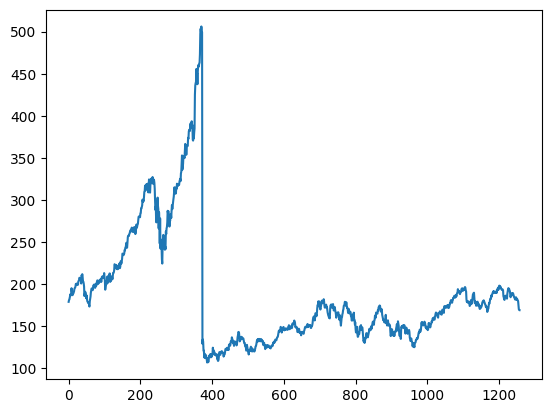

In [42]:
plt.plot(df1)

In [43]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scalar

In [44]:
import numpy as np

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [46]:
print(df1)

[[0.18048842]
 [0.18552286]
 [0.18752661]
 ...
 [0.15849718]
 [0.15599249]
 [0.15569192]]


In [47]:
df1.shape

(1258, 1)

In [63]:
#Spliting data set into train and test split
training_size = int(len(df1)*0.75)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [64]:
training_size,test_size

(943, 315)

In [65]:
train_data

array([[1.80488416e-01],
       [1.85522855e-01],
       [1.87526612e-01],
       [1.92586099e-01],
       [1.98572323e-01],
       [2.03331246e-01],
       [1.99599249e-01],
       [2.03681904e-01],
       [2.21039449e-01],
       [2.10920476e-01],
       [2.05134627e-01],
       [2.00250470e-01],
       [2.04458359e-01],
       [2.05084534e-01],
       [2.08165310e-01],
       [2.11396368e-01],
       [2.18359424e-01],
       [2.21690670e-01],
       [2.22542267e-01],
       [2.25823419e-01],
       [2.33587977e-01],
       [2.32085160e-01],
       [2.34890420e-01],
       [2.30707577e-01],
       [2.30507201e-01],
       [2.31408892e-01],
       [2.31458986e-01],
       [2.41177207e-01],
       [2.43005636e-01],
       [2.44683782e-01],
       [2.52072636e-01],
       [2.51271133e-01],
       [2.46562304e-01],
       [2.44107702e-01],
       [2.44884158e-01],
       [2.35015654e-01],
       [2.59686913e-01],
       [2.56255479e-01],
       [2.62767689e-01],
       [2.54577332e-01],


In [66]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [67]:
# reshape into X=t, t+1, t+2, t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [68]:
print(X_train)

[[0.18048842 0.18552286 0.18752661 ... 0.25758297 0.25532874 0.26599875]
 [0.18552286 0.18752661 0.1925861  ... 0.25532874 0.26599875 0.2544521 ]
 [0.18752661 0.1925861  0.19857232 ... 0.26599875 0.2544521  0.24340639]
 ...
 [0.10068879 0.0952536  0.09773325 ... 0.11078272 0.10336882 0.09362555]
 [0.0952536  0.09773325 0.09680651 ... 0.10336882 0.09362555 0.08598622]
 [0.09773325 0.09680651 0.10427051 ... 0.09362555 0.08598622 0.10316844]]


In [69]:
print(X_test.shape), print(ytest.shape)

(214, 100)
(214,)


(None, None)

In [96]:
# reshape input to be [samples. time step. features] which is required fro LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [98]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [99]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_22 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
model.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=100, batch_size=65, verbose=1)

Epoch 1/100
13/13 [==============================] - 6s 104ms/step - loss: 0.0297 - val_loss: 6.9432e-04
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0107 - val_loss: 0.0020
Epoch 3/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0090 - val_loss: 2.1802e-04
Epoch 4/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0071 - val_loss: 8.5641e-04
Epoch 5/100
13/13 [==============================] - 0s 25ms/step - loss: 0.0064 - val_loss: 4.4759e-04
Epoch 6/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0057 - val_loss: 2.0914e-04
Epoch 7/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0060 - val_loss: 4.0786e-04
Epoch 8/100
13/13 [==============================] - 0s 27ms/step - loss: 0.0054 - val_loss: 2.1867e-04
Epoch 9/100
13/13 [==============================] - 0s 25ms/step - loss: 0.0064 - val_loss: 4.1312e-04
Epoch 10/100
13/13 [==============================] - 0s 21ms/step 

In [91]:
import tensorflow as tf

In [93]:
tf.__version__

'2.15.0'

In [101]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train_reshaped)
test_predict = model.predict(X_test_reshaped)

7/7 [==============================] - 0s 6ms/step


In [102]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [103]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

208.12682958985096

In [104]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


181.89364751993097

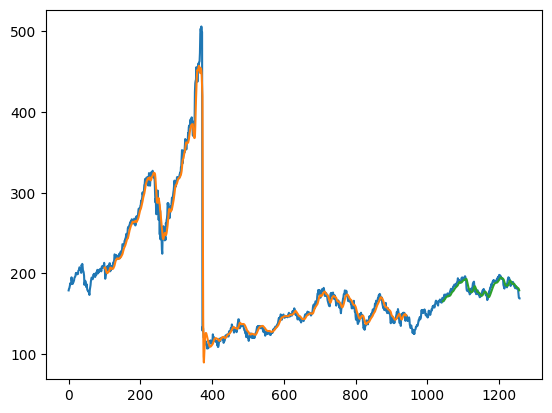

In [105]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [106]:
len(test_data)

315

In [115]:
x_input = test_data[215:].reshape(1,-1)
x_input.shape

(1, 100)

In [116]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [117]:
temp_input

[0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,
 0.16095178459611764,
 0.15040701314965554,
 0.1537382592360676,
 0.15892298058860355,
 0.16012523481527863,
 0.16814026299311202,
 0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257,
 0.18780212899185966,
 0.19048215403882274,
 0.1892798998121477,
 0.19927363807138382,
 0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.21410144020037564,
 0.21898559799624295,
 0.22259236067626798,
 0.21625547902316838,
 0.22008766437069505,
 0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.

In [118]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.17167667]
101
1 day input [0.18003757 0.1761052  0.17282405 0.17187226 0.16541014 0.16571071
 0.16681277 0.16095178 0.15040701 0.15373826 0.15892298 0.16012523
 0.16814026 0.17715717 0.17485285 0.18131497 0.18780213 0.19048215
 0.1892799  0.19927364 0.19526612 0.20187852 0.2033062  0.20756418
 0.20751409 0.21192235 0.20989355 0.2115717  0.2082154  0.20776456
 0.20929242 0.20671259 0.20816531 0.21139637 0.20686287 0.21685661
 0.21410144 0.2189856  0.22259236 0.21625548 0.22008766 0.22822793
 0.22860363 0.2272511  0.22304321 0.22567314 0.22038823 0.22001252
 0.21730745 0.21592987 0.21618034 0.21725736 0.21462743 0.19737007
 0.19388854 0.18802755 0.18619912 0.19716969 0.19611772 0.19874765
 0.19724483 0.19807138 0.19233563 0.18995617 0.20485911 0.21219787
 0.21803381 0.22126487 0.21956168 0.21873513 0.21435191 0.21262367
 0.20338134 0.19426425 0.2004258  0.19789606 0.20247965 0.20653726
 0.20681277 0.20408265 0.20541014 0.20115216 0.19586725 0.19363807
 0.19291171 0.18902943 0.18715091

In [119]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [120]:

import matplotlib.pyplot as plt

In [121]:

len(df1)

1258

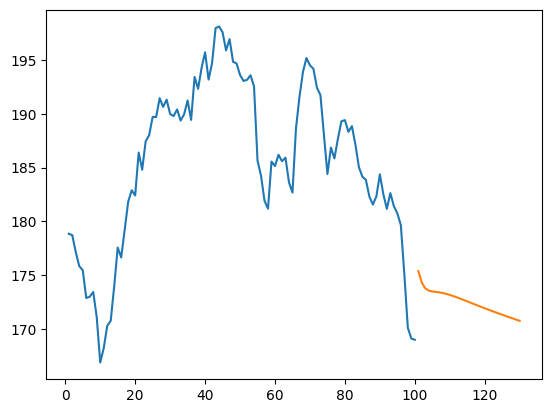

In [122]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

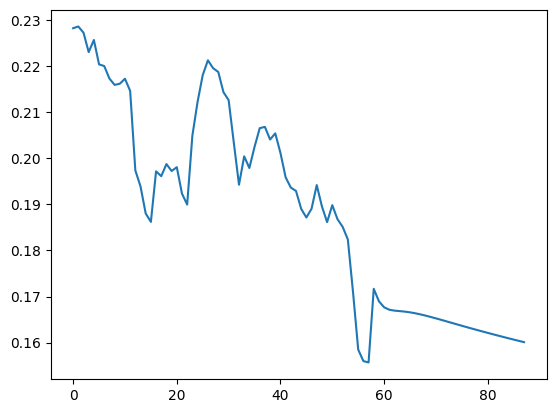

In [123]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [124]:
df3=scaler.inverse_transform(df3).tolist()

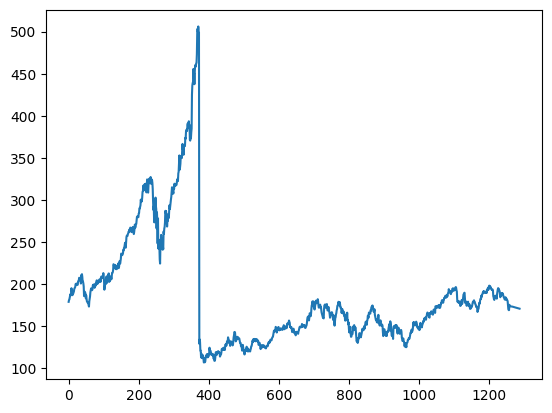

In [125]:

plt.plot(df3)